# Importing Important Libraries
I have imported the stopwords from sklrean and copied more of them from chatgpt.

Instead of split() function, I am using the tokenizer which makes the job much easier.

Instead of manually downloading the data from the internet, I have downloaded it using sklearn.datasets.fetch_20newsgroups

In [3]:
from sklearn.datasets import fetch_20newsgroups
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [4]:
newsgroup = fetch_20newsgroups()
# instead of the link, I have fetched the data through sklearn itself.

stop = set(ENGLISH_STOP_WORDS)
# these are the stopwords which we don't want to include in out vocabulary.

punctuation = list(string.punctuation)
# punctuation marks should alse be removed from our vocabulary.

stop.update(punctuation)

newsgroup.keys()
# now we have all the unnecessary words and punctuation marks in our set "stops"
# lets check what keys do we have in our data.

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
# This component is used to add more words to the list of stop words
# I have copied these words from chatgpt
# After using these words the accuracy decreased, so I felt I am overdoing it
# That is why this component is commented out
'''
more_stops = np.loadtxt('stop.txt', dtype = str, delimiter=" ")
stop.update(more_stops)
len(stop)
'''

'\nmore_stops = np.loadtxt(\'stop.txt\', dtype = str, delimiter=" ")\nstop.update(more_stops)\nlen(stop)\n'

In [6]:
all_documents = newsgroup.data
# this represents "X", it contains data in untokenized form

all_categories = newsgroup.target
# this reprsents "Y", target value is in form of number, instead of class name

all_documents_modified = [word_tokenize(word) for word in all_documents]
# This modifies all documents, we convert a document from a single sting to a list of words
# So in "all_documents_modified" is a list of list of words, this is tokenizing of each document

In [7]:
x_train, x_test, y_train, y_test = train_test_split(all_documents_modified, all_categories, random_state = 1)
# In this we are splitting the data in train and test sets

In [8]:
# This fuctions converts all words in the input dataset to lower case
# This is done so that 2 same words don't get counted as different because of upper and lower case
def doc_lower (x_data) :
    for i in range(len(x_data)) :
        # Iterating to every single list/document one by one
        
        x_data[i] = [word.lower() for word in x_data[i]]
        # Iterating over very word in a list and converting it into lower case
        # Saving the modified list/document in place on the original list/document

    return x_data

In [9]:
x_train = doc_lower(x_train)

In [10]:
x_test = doc_lower(x_test)

In [11]:
all_words = []
# This list will contain all the useful words from all the documents
# In this words are repeated because it will be used to find the frequency of each word

for doc in x_train :
    # Iterating over each document/ list
    for word in doc :
        # Iterating over each word in each document
        if (word not in stop) and len(word) != 1 and len(word) != 2 and ("'" not in word) and ("." not in word) :
            all_words.append(word.lower())
            # All stop words are excluded
            # Words of length 1 and 2 are not considered
            # Words containing punctuation ' and . are also excluded

In [12]:
len(all_words)

1212014

In [13]:
# This function is used to calculate and store frequency of each word
# Key is the words and value is the frequency of words

def freq_dict(all_words) :
    dic = dict()

    for word in all_words :
        # Iterating over all words one by one

        if word in dic.keys() :
            dic[word] = dic[word] + 1
            # If word is already present increasing its frequency by one

        else :
            dic[word] = 1
            # If word is encountered for the first time, setting its frequency as 1
    
    return dic

dic = freq_dict(all_words)

In [14]:
# Extracting keys and values from "dic" to 2 seperate numpy array

words = np.array([i for i in dic.keys()])
# It contains keys i.e. words itself

freq = np.array([i for i in dic.values()])
# It contains values i.e. frequency of each word

In [15]:
# In this we are sorting the "words" and "freq" on basis of "freq"
# Sorting is done in descending order

words = words[np.argsort(freq)][::-1]

freq = np.sort(freq)[::-1]

# Frequency Distribution of words

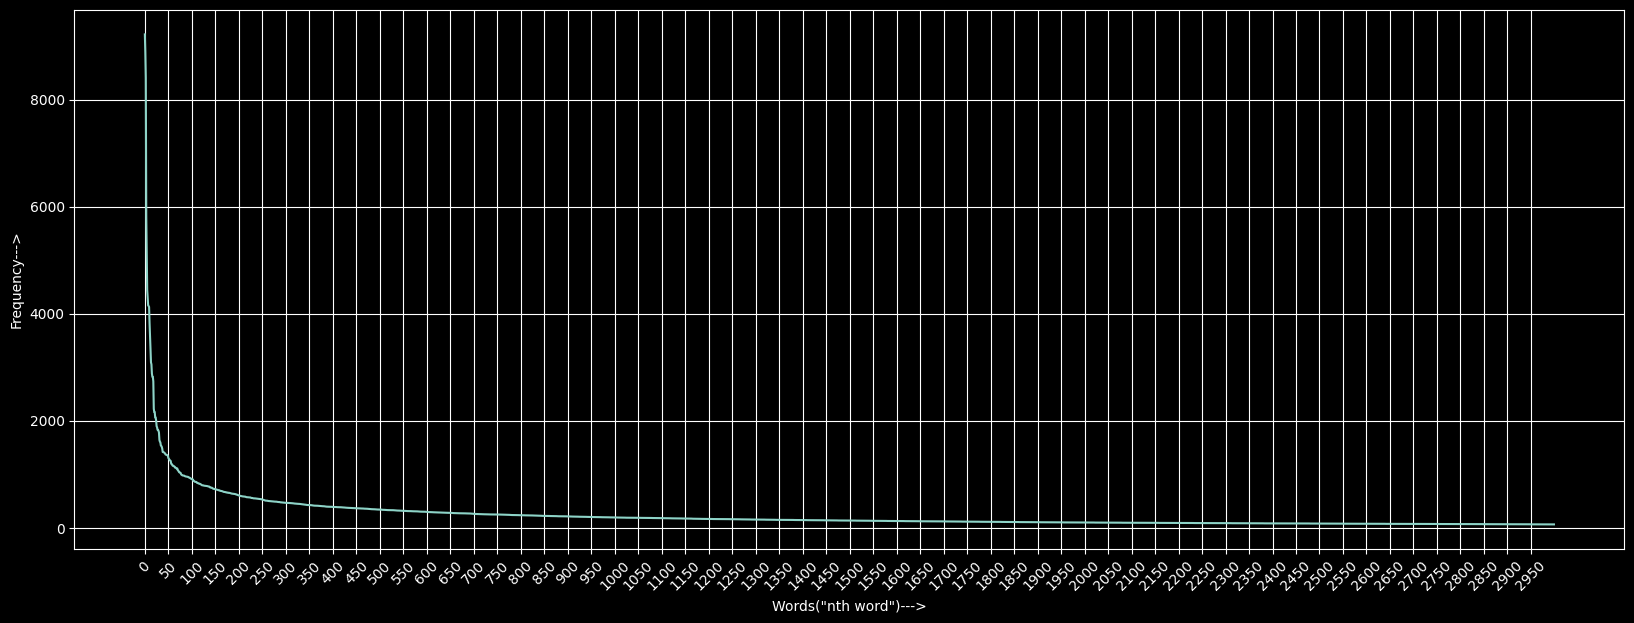

In [16]:
#This cell draws a frequency distribution graph for us to from where we can 
#carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.

lower_limit=0
upper_limit=3000
difference_between_each_xtick=50
#change these values to observe the graph in more depth 
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting

plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling

plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks

plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, 
#upper_limit and difference_between_each_xtick.

In [17]:
freq[0:20]

array([9216, 8882, 8406, 5820, 5050, 4442, 4293, 4158, 4144, 4126, 3824,
       3599, 3348, 3093, 3054, 2883, 2823, 2821, 2736, 2224])

In [18]:
freq[5000]

36

In [19]:
features = words[6 : 10000]

In [20]:
# This feature is used to convert the input data in form of a 2D Array
# It takes "x_train" or "x_test" and "features" as input
# Iterates every document seperately, creates a dictionary for the words of that document
# Add only those words which are treated as "features"

def data_modifier(x_data, features) :
    modified_data = np.zeros((len(x_data), len(features)))
    # creates a 2D array of all 0's of dimension len("x_data") x len("features")

    count = 0
    max_count = len(x_data)
    # These 2 variables are created to keep track of the prgress
    # Progess provides a visual representation 

    for i in range(len(x_data)) :

        current_doc = x_data[i]
        # we are iterating every document

        dic = dict()
        # We are creating dictionary of the document under consideration
        # It only contains data from the present document

        for word in current_doc :
            # Iterating over very word of the document which is in the word of a list
            # and all words tokenized

            if word in dic.keys() :
                dic[word] = dic[word] + 1
                # If word is already present increasing its frequency by one

            else :
                dic[word] = 1
                # If word is encountered for the first time, setting its frequency as 1
        
        for j in range(len(features)) :
            # In this we go through all features (words) used for prediction
            # If the word is present in the document we add its frequency in the table
            # If the word is not present then the frequency is 0
            
            if features[j] in dic.keys() :
                modified_data[i][j] = dic[features[j]]
                # If word is present we are putting its frequency in the table

            else :
                # Since the array by default contains 0's we don't need to put 0 ourself
                # in case where we don't have word same as the feature
                continue
        
        count = count + 1

        print("progress: ", (count*100)/max_count, "%")
        # This part gives a visual representation

    return modified_data

In [21]:
x_train_modified = data_modifier(x_train, features)

progress:  0.011785503830288745 %
progress:  0.02357100766057749 %
progress:  0.03535651149086624 %
progress:  0.04714201532115498 %
progress:  0.05892751915144372 %
progress:  0.07071302298173247 %
progress:  0.08249852681202122 %
progress:  0.09428403064230996 %
progress:  0.1060695344725987 %
progress:  0.11785503830288745 %
progress:  0.1296405421331762 %
progress:  0.14142604596346495 %
progress:  0.15321154979375368 %
progress:  0.16499705362404243 %
progress:  0.17678255745433116 %
progress:  0.18856806128461992 %
progress:  0.20035356511490865 %
progress:  0.2121390689451974 %
progress:  0.22392457277548616 %
progress:  0.2357100766057749 %
progress:  0.24749558043606365 %
progress:  0.2592810842663524 %
progress:  0.27106658809664114 %
progress:  0.2828520919269299 %
progress:  0.2946375957572186 %
progress:  0.30642309958750735 %
progress:  0.3182086034177961 %
progress:  0.32999410724808487 %
progress:  0.3417796110783736 %
progress:  0.3535651149086623 %
progress:  0.365350

In [22]:
x_test_modified = data_modifier(x_test, features)

progress:  0.03534817956875221 %
progress:  0.07069635913750442 %
progress:  0.10604453870625663 %
progress:  0.14139271827500885 %
progress:  0.17674089784376104 %
progress:  0.21208907741251326 %
progress:  0.24743725698126545 %
progress:  0.2827854365500177 %
progress:  0.3181336161187699 %
progress:  0.3534817956875221 %
progress:  0.38882997525627433 %
progress:  0.4241781548250265 %
progress:  0.4595263343937787 %
progress:  0.4948745139625309 %
progress:  0.5302226935312832 %
progress:  0.5655708731000354 %
progress:  0.6009190526687875 %
progress:  0.6362672322375398 %
progress:  0.671615411806292 %
progress:  0.7069635913750442 %
progress:  0.7423117709437964 %
progress:  0.7776599505125487 %
progress:  0.8130081300813008 %
progress:  0.848356309650053 %
progress:  0.8837044892188052 %
progress:  0.9190526687875574 %
progress:  0.9544008483563097 %
progress:  0.9897490279250618 %
progress:  1.025097207493814 %
progress:  1.0604453870625663 %
progress:  1.0957935666313185 %
pro

# Trying out the inbuilt Multinomial Naive Bayes classifier

In [23]:
# Here we have implemented the inbuilt Multinomial classifier
clf=MultinomialNB()
clf.fit(x_train_modified, y_train)
clf.score(x_test_modified, y_test)

# If we want to increase the accuracy then we can just increase the
# number of words under consideration or features 
# As we increase the number of features accuracy increases
# But since the frequency of decrease exponentially, I somehow didn't want to do that
# But we can also look it in this manner absence of word can also to used to 
# confirm that for sure the document doesn't belong to a particular class

0.863909508660304

# Writing our own Naive Bayes Classifier

In [30]:
# We give "x_train" and "y_train" as input to fit function 

# It creates a 2 level dictionary

# 1st level has all possible classes as keys

# 2nd level has sum of frequencies of each word/feature that 
# are present in the document belonging to the particular class
# We also add sum of frequencies of all words/features in 2nd level
# which represent total number of frequecies of words under consideration
# in the document of the particular class under consideration

def fit(x_train, y_train) :

    result = dict()
    #creating dictionary

    for i in range(20) :
        # We have 20 classes in our dataset, so iterating for those 20 classes

        need_docs = x_train[y_train == i]
        # Seperating documents belonging to class under consideration

        result[i] = dict()
        #adding the current class as key and creating 2nd level dictionary as the corresponding value

        result[i]['total'] = 0 

        for j in range(len(features)) :
            result[i][features[j]] = need_docs[:, j].sum()
            # sum of all the frequecies of a particular word from all docements

            result[i]['total'] = result[i]['total'] + result[i][features[j]]
            # sum of frequecies of all the words under consideration

    return result


# It uses dictionary by "fit" function, one document and
# class for which we are checking as input

# It finds the probability that the document belongs to the current class
# We find the probability that a particular word appears in the document
# We then add all these probabilites to find final probability
# Probabilites need to be multiplied but logarithmic probabilites 
# need to be added because of property of log 

def probability(result, doc, current_class) :

    probability_for_each_word = []
    # Stores probability for each word in features which is present in the
    # current document. 
    # We store the logarithmic value of probabilities and add them up at the end

    for i in range(len(doc)) :

        if doc[i] != 0 :
            # doc[i] = 0 means that the word in features is not present in 
            # the document under consideration 

            numerator = result[current_class][features[i]]
            # Freqency of word/feature under consideration in all the 
            # documents of the current class 

            denominator = result[current_class]['total']
            # Total number of words present in all the documents of the 
            # current class 

            prob = np.log((numerator + 1) / (denominator + len(doc)))

            probability_for_each_word.append(prob)
            # adding probability to list

    return sum(probability_for_each_word)

# Predicts for a single document, by calculating probablity of each class
# and selecting the best class

def predict_single(result, doc) :
    classes = result.keys()
    # all possible classes

    best_probability = - 1000
    # stores value of probablity of the best class
    best_class = -1
    # stores the most probable class

    first_run = True

    for current_class in classes :
        # iterating for each class

        probability_current_class = probability(result, doc, current_class)
        # "probability_current_class" stores the probablity of current class

        if (first_run) or probability_current_class > best_probability :
            # we compare it with the best_probability until now
            # If greater then we update the best class

            best_probability = probability_current_class
            best_class = current_class
        
        first_run = False
    
    return best_class

# Predicts on the entire data by predicting on single document at a time

def predict(x_test, result) :
    y_pred = []
    # stores answer of the prediction

    for doc in x_test :
        # Iterates over each document in x_test

        y_pred.append(predict_single(result, doc))
        # Predicting for a single document and storing the result
    
    return y_pred

In [27]:
result = fit(x_train_modified, y_train)
# calling the fit function for the modified data.

In [31]:
y_pred = predict(x_test_modified, result)
# storing the predicted values.

In [32]:
from sklearn.metrics import confusion_matrix
# printing the confusion matrix for our own naive bayes classifier.
# I have manually printed the confusion matrix for a more clear view.
for i in confusion_matrix(y_true = y_test, y_pred = y_pred):
    for j in i:
        print(j, end="    ")
    print()

103    0    0    0    0    0    0    0    0    0    0    0    0    0    0    5    0    0    1    5    
0    130    3    8    4    5    0    1    0    0    0    1    0    0    0    0    0    0    0    0    
0    18    76    27    3    13    1    1    0    0    0    0    0    0    0    0    0    0    0    0    
0    5    1    126    10    2    4    1    0    0    0    0    3    0    0    0    0    0    0    0    
0    4    1    4    122    0    4    1    0    0    0    0    0    1    0    0    1    0    0    0    
0    19    2    3    1    125    1    0    0    0    0    0    0    1    1    0    0    0    0    0    
0    4    0    11    3    1    108    5    2    1    0    2    5    0    0    0    0    1    4    0    
0    3    0    1    0    0    6    123    1    1    0    0    2    0    0    0    0    0    0    0    
0    0    0    0    0    0    3    9    117    0    0    0    0    0    0    0    2    0    0    0    
0    2    0    1    0    0    1    1    0    128    0    0    0    0

In [33]:
from sklearn.metrics import classification_report
# printing the classification report for our own naive bayes classifier.
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       114
           1       0.63      0.86      0.73       152
           2       0.92      0.55      0.68       139
           3       0.63      0.83      0.72       152
           4       0.81      0.88      0.84       138
           5       0.82      0.82      0.82       153
           6       0.82      0.73      0.77       147
           7       0.79      0.90      0.84       137
           8       0.95      0.89      0.92       131
           9       0.93      0.95      0.94       135
          10       0.99      0.96      0.97       136
          11       0.92      0.97      0.95       145
          12       0.90      0.71      0.80       157
          13       0.98      0.92      0.95       151
          14       0.98      0.88      0.93       155
          15       0.86      0.94      0.90       159
          16       0.86      0.94      0.89       140
          17       0.98    

# Observations
It seems like the recall of some of the classes is excellent while for others is moderate this is most probably because of the selection of features. The more accurately we select features, the more will be the f1-score, precision and recall values. although from the confusion matrix, we can determine that our algorithm is not that bad. It seems to be working very precisely for some classes. And an accuracy of nearly 85% is not that bad. The accuracy is coming out to be equal to the one we got from the inbuilt multinomial naive Bayes algorithm. And better accuracy could be obtained by working on the selection of features. The accuracy can be increased by increasing the number of features. but it will not be worth it because as we keep on increasing the number of features the "increase in the accuracy" will keep on decreasing. So it would be more computationally viable to take up to just 10k or 20k features in our vocabulary for such a dataset.